# Web Scraping

For this exercise we are scraping a book website which was specifically designed for practicing that: [Books.ToScrape](http://books.toscrape.com).

The API documentation page of iexcloud.io can be found [here](https://iexcloud.io/docs/api/).

The difficulty for this exercise will be the pagination of the website which will require us to do some extra work to get all the data for the books.

In [2]:
# We start with the regular imports
import requests
from bs4 import BeautifulSoup

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib

In [5]:
url = 'http://books.toscrape.com/'

# TODO: Use `requests` to do an HTTP request to fetch data located at that URL
response = requests.get(url)

# TODO: Create a `BeautifulSoup` instance with that data
soup = BeautifulSoup(response.content)

soup

nd ratings here were randomly assigned and have no real meaning.</div>
<div>
<ol class="row">
<li class="col-xs-6 col-sm-4 col-md-3 col-lg-3">
<article class="product_pod">
<div class="image_container">
<a href="catalogue/a-light-in-the-attic_1000/index.html"><img alt="A Light in the Attic" class="thumbnail" src="media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg"/></a>
</div>
<p class="star-rating Three">
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
</p>
<h3><a href="catalogue/a-light-in-the-attic_1000/index.html" title="A Light in the Attic">A Light in the ...</a></h3>
<div class="product_price">
<p class="price_color">£51.77</p>
<p class="instock availability">
<i class="icon-ok"></i>
    
        In stock
    
</p>
<form>
<button class="btn btn-primary btn-block" data-loading-text="Adding..." type="submit">Add to basket</button>
</form>
</div>
</article>
</li>
<li class="col-xs-6 col-sm-4 col-m

In [7]:
books_html = soup.find_all('article', class_='product_pod')
books_html

[<article class="product_pod">
 <div class="image_container">
 <a href="catalogue/a-light-in-the-attic_1000/index.html"><img alt="A Light in the Attic" class="thumbnail" src="media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg"/></a>
 </div>
 <p class="star-rating Three">
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 </p>
 <h3><a href="catalogue/a-light-in-the-attic_1000/index.html" title="A Light in the Attic">A Light in the ...</a></h3>
 <div class="product_price">
 <p class="price_color">£51.77</p>
 <p class="instock availability">
 <i class="icon-ok"></i>
     
         In stock
     
 </p>
 <form>
 <button class="btn btn-primary btn-block" data-loading-text="Adding..." type="submit">Add to basket</button>
 </form>
 </div>
 </article>,
 <article class="product_pod">
 <div class="image_container">
 <a href="catalogue/tipping-the-velvet_999/index.html"><img alt="Tipping the Velvet" class="thu

## Parsing _one_ book

Let's retrieve 3 different information from the first book:
- Title
- Price
- Rating

In [12]:
first_book = books_html[0]
first_book

<article class="product_pod">
<div class="image_container">
<a href="catalogue/a-light-in-the-attic_1000/index.html"><img alt="A Light in the Attic" class="thumbnail" src="media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg"/></a>
</div>
<p class="star-rating Three">
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
</p>
<h3><a href="catalogue/a-light-in-the-attic_1000/index.html" title="A Light in the Attic">A Light in the ...</a></h3>
<div class="product_price">
<p class="price_color">£51.77</p>
<p class="instock availability">
<i class="icon-ok"></i>
    
        In stock
    
</p>
<form>
<button class="btn btn-primary btn-block" data-loading-text="Adding..." type="submit">Add to basket</button>
</form>
</div>
</article>

In [31]:
# Before we are retrieving the right data from the book list we need to define a function for generating the book rating
def parse_rating(rating_class):
    rating_dict = {
        'One': 1,
        'Two': 2,
        'Three': 3,
        'Four': 4,
        'Five': 5
    }
    if rating_class in rating_dict:
        return rating_dict[rating_class]


In [32]:
# Identify the book title
first_book_title = first_book.find('h3').find('a').attrs['title']
# Ifentify the book price
first_book_price = float(first_book.find('div', class_='product_price').find('p').string[1:])
# Identify the book rating
first_book_rating = parse_rating(first_book.find('p', class_='star-rating').attrs['class'][1])

3

## Parsing _all_ books

We now need to glue all the code above and put it inside a for loop over the books variable! This variable is given by soup in return of the .find_all function call.

In [36]:
# First we will need to define an empty dict for all the books
books = {
    'Title': [],
    'Price': [],
    'Rating': []
}

In [37]:
for book in books_html:
    # First, we identify the correct data for eery book
    title = book.find('h3').find('a').attrs['title']
    price = float(book.find('div', class_='product_price').find('p').string[1:])
    rating = parse_rating(book.find('p', class_='star-rating').attrs['class'][1])

    books['Title'].append(title)
    books['Price'].append(price)
    books['Rating'].append(rating)

# Let's see our result
books

{'Title': ['A Light in the Attic',
  'Tipping the Velvet',
  'Soumission',
  'Sharp Objects',
  'Sapiens: A Brief History of Humankind',
  'The Requiem Red',
  'The Dirty Little Secrets of Getting Your Dream Job',
  'The Coming Woman: A Novel Based on the Life of the Infamous Feminist, Victoria Woodhull',
  'The Boys in the Boat: Nine Americans and Their Epic Quest for Gold at the 1936 Berlin Olympics',
  'The Black Maria',
  'Starving Hearts (Triangular Trade Trilogy, #1)',
  "Shakespeare's Sonnets",
  'Set Me Free',
  "Scott Pilgrim's Precious Little Life (Scott Pilgrim #1)",
  'Rip it Up and Start Again',
  'Our Band Could Be Your Life: Scenes from the American Indie Underground, 1981-1991',
  'Olio',
  'Mesaerion: The Best Science Fiction Stories 1800-1849',
  'Libertarianism for Beginners',
  "It's Only the Himalayas"],
 'Price': [51.77,
  53.74,
  50.1,
  47.82,
  54.23,
  22.65,
  33.34,
  17.93,
  22.6,
  52.15,
  13.99,
  20.66,
  17.46,
  52.29,
  35.02,
  57.25,
  23.88,
  3

In [38]:
# Let's create a dataframe based on the books
books_df = pd.DataFrame.from_dict(books)
books_df

,Title,Price,Rating
0,A Light in the Attic,51.77,3
1,Tipping the Velvet,53.74,1
2,Soumission,50.10,1
3,Sharp Objects,47.82,4
4,Sapiens: A Brief History of Humankind,54.23,5
5,The Requiem Red,22.65,1
6,The Dirty Little Secrets of Getting Your Dream...,33.34,4
7,The Coming Woman: A Novel Based on the Life of...,17.93,3
8,The Boys in the Boat: Nine Americans and Their...,22.60,4
9,The Black Maria,52.15,1


<AxesSubplot:xlabel='Rating'>

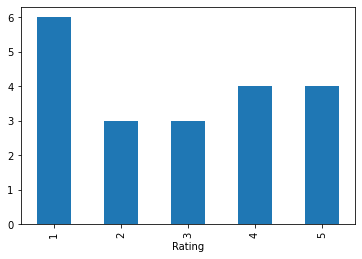

In [40]:
# Let's check out the rating by plotting the current data
books_df.groupby('Rating').count()['Title'].plot(kind='bar')

## Going through all the pages of the catalogue



In [46]:
# We start with defining the amount of pages
pages = list(range(1,51))

# Then we will need to define an empty dict for all the books
books = {
    'Title': [],
    'Price': [],
    'Rating': []
}

for page in pages:
    # Assigning the URL dynamically based on the page, requesting an answer and creating the soup object
    url = f'http://books.toscrape.com/catalogue/page-{page}.html'
    response = requests.get(url)
    soup = BeautifulSoup(response.content)

    # We find all the books
    books_html = soup.find_all('article', class_='product_pod')

    for book in books_html:
        # First, we identify the correct data for eery book
        title = book.find('h3').find('a').attrs['title']
        price = float(book.find('div', class_='product_price').find('p').string[1:])
        rating = parse_rating(book.find('p', class_='star-rating').attrs['class'][1])

        books['Title'].append(title)
        books['Price'].append(price)
        books['Rating'].append(rating)

# Let's create a dataframe based on all of the books
books_df = pd.DataFrame.from_dict(books)
books_df

,Title,Price,Rating
0,A Light in the Attic,51.77,3
1,Tipping the Velvet,53.74,1
2,Soumission,50.10,1
3,Sharp Objects,47.82,4
4,Sapiens: A Brief History of Humankind,54.23,5
...,...,...,...
995,Alice in Wonderland (Alice's Adventures in Won...,55.53,1
996,"Ajin: Demi-Human, Volume 1 (Ajin: Demi-Human #1)",57.06,4
997,A Spy's Devotion (The Regency Spies of London #1),16.97,5
998,1st to Die (Women's Murder Club #1),53.98,1


<AxesSubplot:xlabel='Rating'>

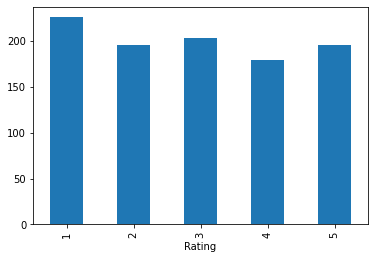

In [47]:
# Let's check out the rating by plotting the current data again and see how 50 times the amount of books changed the plot
books_df.groupby('Rating').count()['Title'].plot(kind='bar')

<AxesSubplot:>

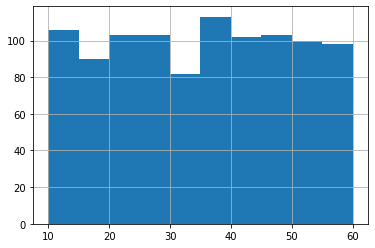

In [48]:
# Let's also have a look at the prices
books_df['Price'].hist()

In [49]:
# Finally, let's save our results in a CSV file to have some valuable output of our work
books_df.to_csv('books.csv')